In [205]:
#disease infection mean
mu = 0.8
#cost per patient mean
kappa = 2.3

#standard deviations of the same quantities
smu = 0.628
sk = 0.61

#estimate variance of TC_n
def var_est(mu =0.8,kappa =2.3,smu = 0.628, sk = 0.61, nf = 0):
    """
    Inptus: mu, k, sigma_mu, sigma_k
    Output: Var(Tc_n)
    
    """
    gn = lambda n: sk+kappa**2-kappa +2*kappa**2*mu*(mu**n-1)/(mu-1) +(smu+mu**2-mu)*(kappa**2)*((mu**n-1)/(mu-1))**2

    ss = 0
    nn2 = nf
    nn = nn2+1
    for i in range(0,nn2+1):
        ss += gn(nn2-i)*mu**(i)
    
    final = ss+kappa*(mu**nn-1)/(mu-1)-(kappa*(mu**nn-1)/(mu-1))**2
    return final

#estimate mean of TC_n
def mean_est(mu=0.8, kappa = 2.3, nf = 0):
    """
    input: mu, k
    Output E[TC_n]
    """
    nn = nf+ 1
    return kappa*(mu**nn-1)/(mu-1)

print(var_est(nf=1), mean_est(nf=30))

4.420120000000008 11.488610951638575


In [21]:
import numpy as np

In [60]:
cost_dist = [0.2,0.3,0.5]
gen_dist = [0.5,0.2,0.3]

def simulate(cost_dist, gen_dist):
    """
    Input:
    cost_dist:(List) cost distribution
    gen_dist:(List) infection spread distribution
    
    return: X_n, C_n
    
    """
    xn = [0,1,2]
    X_n = [1]
    cn = [1,2,3]
    C_n = [np.random.choice(cn,size = X_n[-1],p=cost_dist)[0]]
    while True: #until branching process dies
        
        #generate X_n
        Xn = sum([np.random.choice(xn,size = 1,p=gen_dist)[0] for i in range(X_n[-1])])
        if Xn == 0:
            break
        else:
            X_n.append(Xn)
            
        C_n.append(sum(np.random.choice(cn, size = X_n[-1],p=cost_dist)))
    return np.array(X_n), np.array(C_n)
        
        
    
    
    

In [164]:
%%time
K = 500000
time_to_finish = np.zeros(K)

#E[TC_n]
tcn = np.zeros(100)

#E[TX_n]
txn = np.zeros(100)

# TC_n,k we save all TC_n sequneces 
#for all simulations
tctot = np.zeros([K,100])
ml = 0

#Simulate for K=500,000
for i in range(K):
    Xn,Cn = simulate(cost_dist, gen_dist)
    time_to_finish[i] = len(Xn)
    if len(Xn) > ml:
        ml = len(Xn)
    tctot[i,:len(Xn)] = Cn
    tcn[:len(Xn)] += Cn
    txn[:len(Xn)] += Xn
tctot = np.array(tctot)
tcn/=K
txn/=K

CPU times: user 3min 10s, sys: 607 ms, total: 3min 10s
Wall time: 3min 10s


In [175]:
#E[TC_n] n goes to infinity
TCN = sum(tcn)


In [177]:
#Sample variance and mean for n < 15
var = np.var(np.cumsum(tctot,axis = 1), axis = 0)[0:15]
mean = np.mean(np.cumsum(tctot,axis = 1), axis = 0)[0:15]

In [204]:
var[1]

5.1190193904019345

In [194]:
np.sqrt(var[14])/np.sqrt(K)

0.027487776644925636

In [179]:
the_var = np.zeros(15)
the_mean = np.zeros(15)

for i in range(15):
    the_var[i] = var_est(nf = i)
    the_mean[i] = mean_est(nf = i)

In [180]:
import matplotlib.pyplot as plt
import matplotlib as mpl

div = 1

l1 = 22/div
l2 = 20/div
l3 = 13/(div-0.2)

mpl.rcParams['xtick.labelsize'] = l2
mpl.rcParams['ytick.labelsize'] = l2
mpl.rcParams['axes.labelsize'] = l1
mpl.rcParams['font.serif'] = 'Times New Roman'
mpl.rcParams['font.weight'] = 'normal'
mpl.rcParams['font.size'] = 20
mpl.rcParams['legend.fontsize'] = l3

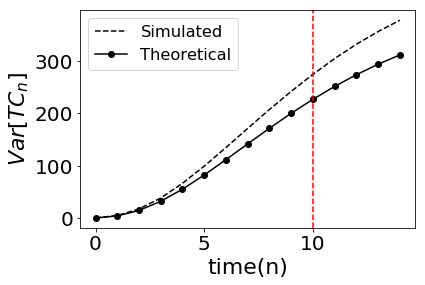

In [181]:
fig, ax = plt.subplots(1,1)
ax.plot(np.arange(15), var,'k--')
ax.plot(np.arange(15), the_var,'ko-')
ax.set_xlabel('time(n)')
ax.set_ylabel(r'$Var[TC_n]$')
ax.axvline(x= 10, color='r', linestyle='--')

ax.legend(['Simulated', 'Theoretical'])
fig.savefig('var.jpeg',bbox_inches='tight', pad_inches = 0)
fig.show()

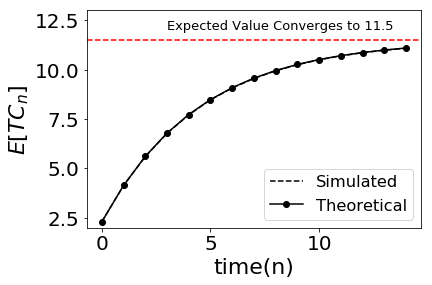

In [188]:
fig, ax = plt.subplots(1,1)
ax.plot(np.arange(15), mean,'k--')
ax.plot(np.arange(15), the_mean,'ko-')
ax.set_xlabel('time(n)')
ax.set_ylabel(r'$E[TC_n]$')
ax.axhline(y= 11.5, color='r', linestyle='--')
ax.set_ylim([2,13])
ax.text(3,12,'Expected Value Converges to 11.5',fontdict ={'size':13})
ax.legend(['Simulated', 'Theoretical'])
fig.savefig('mean.jpeg',bbox_inches='tight', pad_inches = 0)

fig.show()